# paAIP2 Population Analysis

In [1]:
# Configure Notebook width
from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [2]:
# Import packages and modules
import os
import numpy as np

from Lab_Analyses.Population_Analysis import population_utilities as p_utils
from Lab_Analyses.Population_Analysis.preprocess_population_data import organize_population_data
from Lab_Analyses.Population_Analysis.paAIP2_population_analysis import paAIP2_population_analysis
from Lab_Analyses.Population_Analysis.paAIP2_population_plotting import plot_paAIP2_population_dynamics

%matplotlib inline

## Datasets

In [3]:
# paAIP2 mouse ids
pa_1 = "JW156" # Not using due to missing session
pa_2 = "JW157"
pa_3 = "JW158"
pa_4 = "JW159"
pa_5 = "JW175"
pa_6 = "JW176"

pa_mice = [pa_2, pa_3, pa_4, pa_5, pa_6]

# EGFP mouse ids
gfp_1 = "JW196"
gfp_2 = "JW197"
gfp_3 = "JW198"
gfp_4 = "JW199"

gfp_mice = [gfp_1, gfp_2, gfp_3, gfp_4]
gfp_mice = [gfp_1, gfp_2, gfp_4]

## Analysis Parameters
roi_match = False
sensor = "RCaMP2"
zoom_factor = 2
reprocess = False
activity_window = (-1, 2)


## Preprocess data

In [ ]:
# paAIP2 mice
for mouse in pa_mice:
    organize_population_data(
        mouse_id=mouse,
        roi_match=roi_match,
        sensor=sensor,
        zoom_factor=zoom_factor,
        reprocess=reprocess,
        save=True
    )
    
# EGFP mice
for mouse in gfp_mice:
    organize_population_data(
        mouse_id=mouse,
        roi_match=roi_match,
        sensor=sensor,
        zoom_factor=zoom_factor,
        reprocess=reprocess,
        save=True
    )

## Analyze Population Data

In [ ]:
paAIP2_population_analysis(
    paAIP2_mice=pa_mice,
    EGFP_mice=gfp_mice,
    activity_window=activity_window,
    save_ind=True
)

## Visualize data

In [4]:
# Load datasets
EGFP_data_list = p_utils.load_analyzed_pop_datasets(gfp_mice, "EGFP")
paAIP2_data_list = p_utils.load_analyzed_pop_datasets(pa_mice, "paAIP2")

figure_path = r"C:\Users\Jake\Desktop\Figures\grouped_data\paAIP2_Population\Activity"

EGFP 1: 301
EGFP 7: 387
EGFP 14: 356
paAIP2 1: 394
paAIP2 7: 429
paAIP2 4: 422


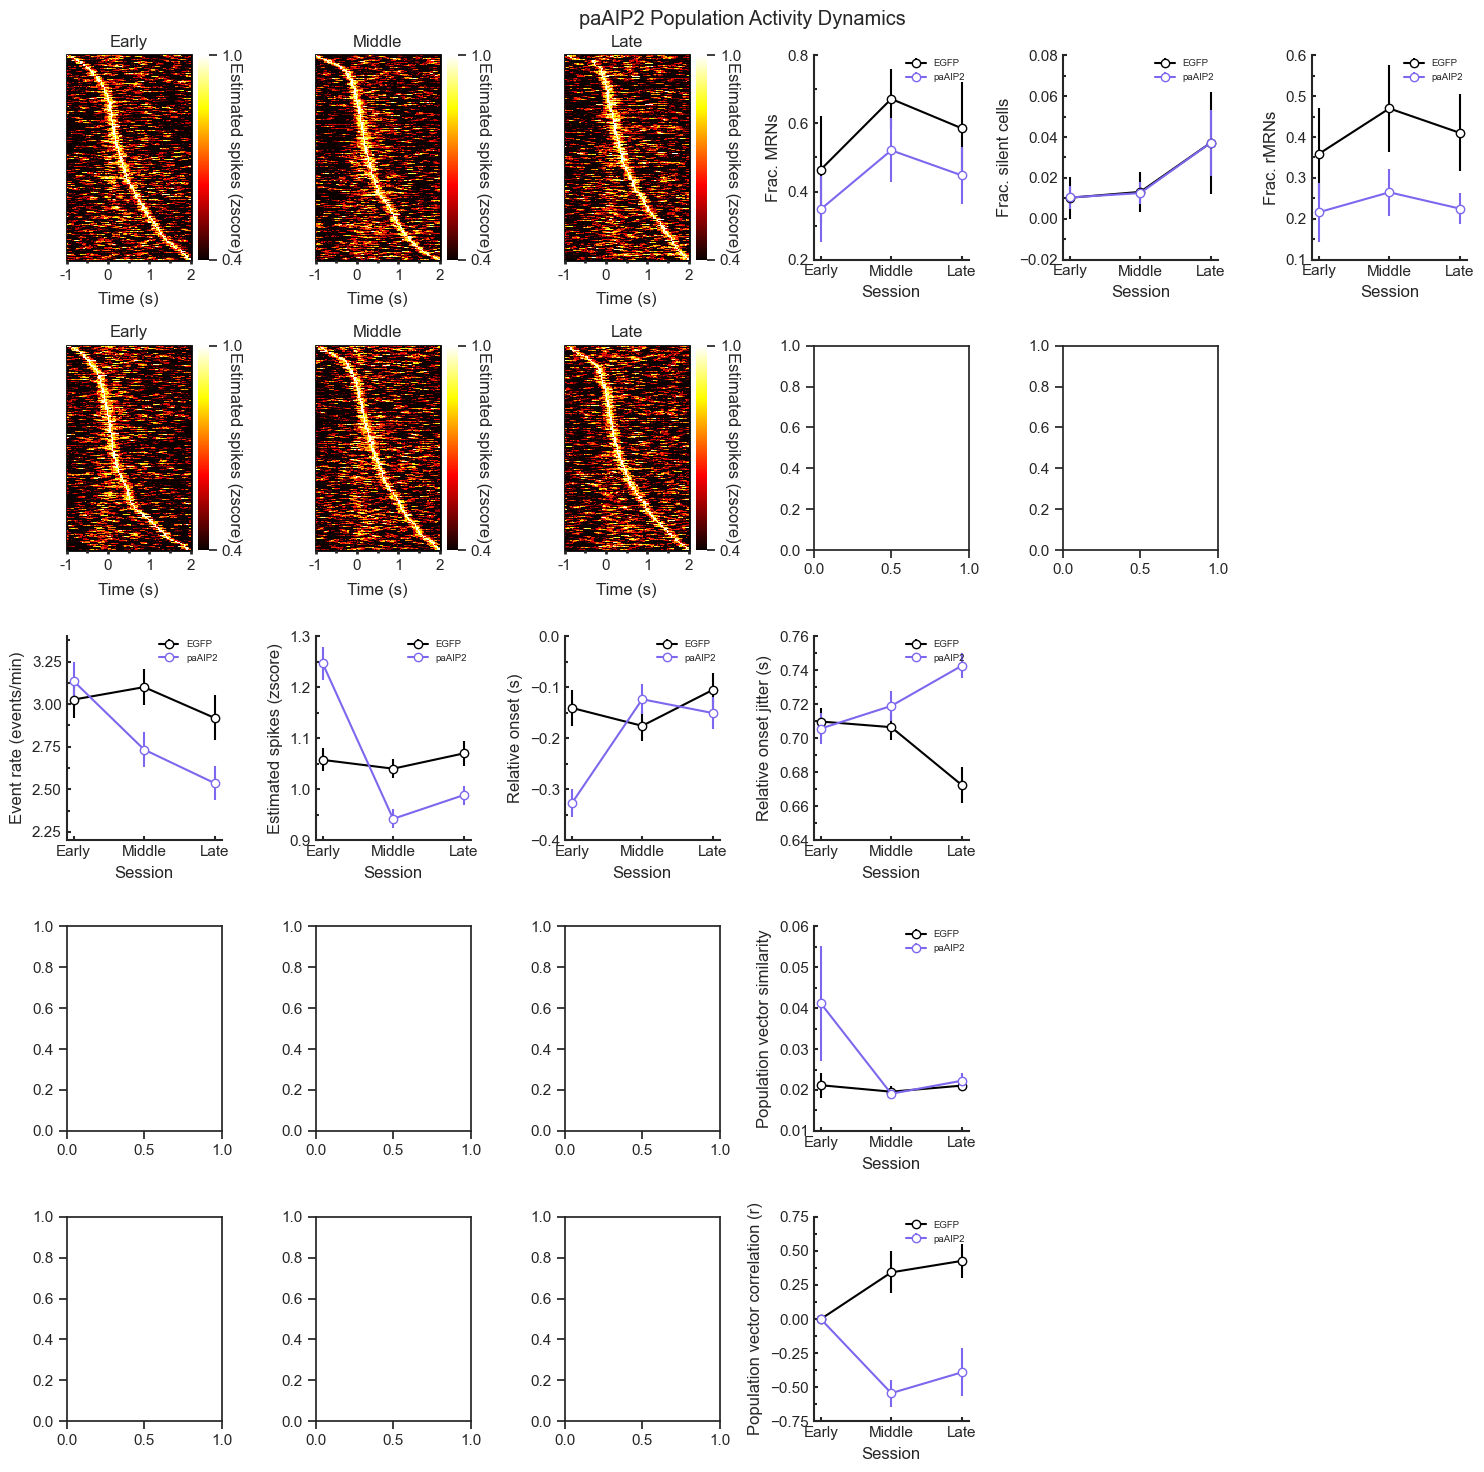

In [5]:
# Plot Activity Dynamics
plot_paAIP2_population_dynamics(
    EGFP_data_list,
    paAIP2_data_list,
    mvmt_only=True,
    norm=True,
    spikes=True,
    example_pa=None,
    example_gfp=None,
    figsize=(15,15),
    save=True,
    save_path=figure_path,
)

In [ ]:
# Plot some session traces
## Select data
data = paAIP2_data_list[0]

## Traces
traces = data.zscore_spikes[0]
mvmt = data.lever_active[0]
color = "mediumslateblue"

In [ ]:
import matplotlib.pyplot as plt
%matplotlib qt
save_path = r"C:\Users\Jake\Desktop\Figures\Examples\Example_images\coactivity_plasticity\Local_Coactivity\basal_stable"

x = np.arange(traces.shape[0]) / 30
fig, ax = plt.subplot_mosaic("""A""",figsize=(7,10))
title = "JW196_EGFP_Day_1"
# Randomly select 20 traces
idxs = np.random.randint(low=0, high=traces.shape[1], size=20)
for j, i in enumerate(idxs):
    print(i)
    ax["A"].plot(x[:], traces[:, i] + j * 10, color=color, linewidth=.5)

In [ ]:
traces

In [ ]:
len(EGFP_data_list[0].individual_mvmt_onsets["Early"][0])